# Predicting Precipitation from towns in Western Massachusetts using Multivariate Regression
Jonathan Clifford, Griffin Manns, Isaiah Provencher

In [2]:
# A few notes before we begin to code:
# 1) All weather data is sourced from NOAA sites in Massachusetts. 
# 2) Due to the way that the data is formatted, we had to truncate to a list of five towns. These cover a fairly broad area
# in western massachusetts, and feel as though it is good to have a starting model based off this. 
# 3) Weather was collected from January 1st 2015 - December 31st 2020

# import dependies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The labels of the data are as follows: 
# STATION|NAME (of town)|LATITUDE|LONGITUDE|ELEVATION|DATE|AWND|PRCP(precipitation, what we are predicting)|SNOW|TAVG|TMAX|TMIN|TOBS|WESF|WT01|...|WT11

# ultimately our algorithm will be predicting the Precipitation of this. 
data = pd.read_csv('NewDataMLEdited.csv', sep=',',header=None).values

stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
# for some reason, the special weather conditions aren't linear WT01...WT11, but whatever.
print("Data has been loaded.")

Data has been loaded.


# Visualization of the dataset

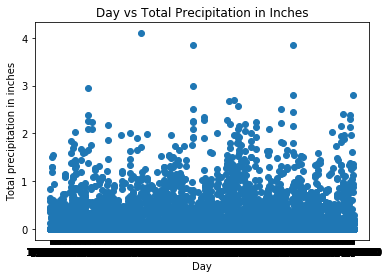

In [2]:
# Now, in order to visualize the data, we will create a simple scatterplot 
# showcasing the x axis as the date, and the y axis as the precipitation. 

plt.scatter(date, precipitation)
plt.xlabel("Day")
plt.ylabel("Total precipitation in inches")
plt.title("Day vs Total Precipitation in Inches")
plt.show()

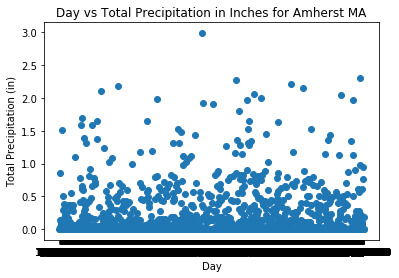

In [3]:
# similarly, I will do the same thing as above, but instead only for one town (Amherst)
curDate = []
curPrecip = []
for i in range(len(date)):
    if townName[i] == "AMHERST, MA US":
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
# print(curPrecip)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA")
plt.show()

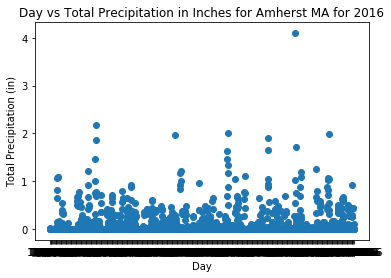

In [4]:
# similarly, we can do the same thing as above for Amherst, but only for the year of 2016. 
curDate = []
curPrecip = []
for i in range(len(date)):
    if "2016" in date[i]:
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA for 2016")
plt.show()

# Reloading A Modified Dataset & Grabbing What We Need

In [158]:
# Now we will begin the actual determination of the dataset. 
# We also need to essentially extract the predictor data from what we want to actually predict.
# in other words, we just need to take out the precipitation dataset from the table. 

# in addition, we will also be reloading the dataset here. 
# Why? Because we had to do quite a few modifcations to the NOAA dataset so multivariate regression works. 
# ex: towns needed to go from being named what they are to numbers, dates are days since jan 1st 1900, etc. 
# since we want as many predictors as possible in order to potentially have the most accurate dataset, 
# we'll have this here be modified, above will remain the same. 
data = pd.read_csv('NewDataMLEdited2.csv', sep=',',header=None).values
stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
print("Data has been loaded.")
dataToUse = np.delete(data,7,1) # make dataToUse to be everything in the data array, except the 7th row (precip)
# also... we're going to have to not use the data from the Tobs table. Why? Because its inconsistent... some times 
# NOAA kept track of the temp at the observed times, sometimes it didn't. 
dataToUse = np.delete(dataToUse, 12, 1)
# now that we've grabbed the data that we want, we can actually start running it through an algorithm
print("dataToUse has grabbed what it needs.")

Data has been loaded.
dataToUse has grabbed what it needs.


# Seperating Into Test & Training Datasets.

In [211]:
# ______________________________________________________________________________________________________________
# Creating the Multivariate Regression Algorithm to actually do what we want. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# need to seperate the data into test and training segments. 
# going to seperate it into 80% train, 20% test
# this ends up being ~8677 train sets, ~2169 test
x_train, x_test, y_train, y_test = train_test_split(dataToUse, precipitation, test_size=0.1)
print(len(y_test)) # returns 2170, we're good! 


1085


# Creating & Quanitfying The Multivariate Regression Model

In [212]:
mv = LinearRegression(normalize = True, n_jobs = -1) # Technically we don't *really* need to normalize, but there are a few 
# datapoints outside of normalization, so it's better safe than sorry. 
mv.fit(x_train, y_train) # fit to the dataset. 

# now compare to what our test data gives us 
yPredTrain = mv.predict(x_train)
yPredTest = mv.predict(x_test)


#_________________________________________________________________________________

# check accuracy compared to the training data. 
trainMSE = (mean_squared_error(y_train, yPredTrain))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

# check accuracy of set compared to the test data
testMSE = (mean_squared_error(y_test, yPredTest))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)

The Mean Squared Error of the Training Model is: 
0.08052010865105896
The Mean Squared Error of the Test Model is: 
0.06311973941009254


In [213]:
#_________________________________________________________________________________
# Now, let's cross validate. 
parameters = {'fit_intercept':[True, False],
              'normalize' : [True, False] ,
              'n_jobs':[1, 10, 100, 1000, 10000, -1]}
gridMV = GridSearchCV(estimator = mv, param_grid = parameters, cv = 10)
gridMV.fit(x_train, y_train)
yPredTrainN = gridMV.predict(x_train)
yPredTestN = gridMV.predict(x_test)


trainMSE = (mean_squared_error(y_train, yPredTrainN))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

testMSE = (mean_squared_error(y_test, yPredTestN))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)


The Mean Squared Error of the Training Model is: 
0.08052010865105896
The Mean Squared Error of the Test Model is: 
0.06311973941009254


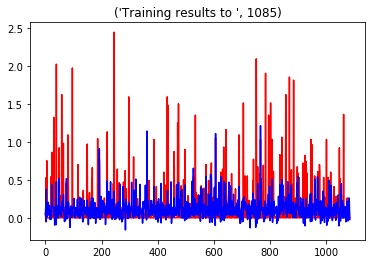

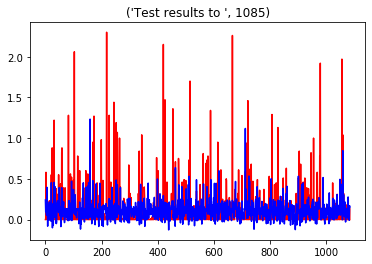

In [214]:
# Now, plot versus actual data. 
# For ease of use, I will only use the first 30 datapoints, specifically with the dates. 
pointToEnd = len(y_test)
plt.plot(y_train[0:pointToEnd], color = 'red')
plt.plot(yPredTrainN[0:pointToEnd], color = 'blue')
title = "Training results to ", pointToEnd
plt.title(title)
plt.show()
plt.plot(y_test[0:pointToEnd], color = "red")
plt.plot(yPredTestN[0:pointToEnd], color = "blue")
title = "Test results to ", pointToEnd
plt.title(title)
plt.show()




# Creating a Regression Decision Tree Classifier For Our Model

In [215]:
# making a decision regression tree & cross validating. 
from sklearn.tree import DecisionTreeRegressor

regTree = DecisionTreeRegressor()
parameters = {'max_depth':[3, 4, 5, 6, 7],
              'min_samples_split':[2, 3, 4],
              'min_samples_leaf':[1,2,3],
              'min_weight_fraction_leaf':[0.0,0.001, 0.01,0.05,0.1],
              'ccp_alpha':[0.0,0.001,0.005,0.01,0.1, 0.5]
             }
gridTree = GridSearchCV(estimator = regTree, param_grid = parameters, cv = 5, n_jobs = -1)
gridTree.fit(x_train, y_train)
predRegTreeTrain = gridTree.predict(x_train)
predRegTreeTest = gridTree.predict(x_test)

trainMSE = (mean_squared_error(y_train, predRegTreeTrain))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

testMSE = (mean_squared_error(y_test, predRegTreeTest))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)

The Mean Squared Error of the Training Model is: 
0.07814298913057836
The Mean Squared Error of the Test Model is: 
0.068396573908097


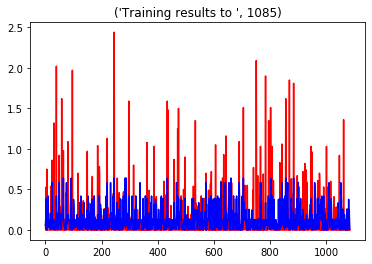

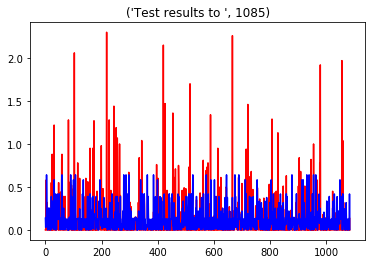

In [216]:
# Now, plot versus actual data. 
# For ease of use, I will only use the first 30 datapoints, specifically with the dates. 
pointToEnd = len(y_test)
plt.plot(y_train[0:pointToEnd], color = 'red')
plt.plot(predRegTreeTrain[0:pointToEnd], color = 'blue')
title = "Training results to ", pointToEnd
plt.title(title)
plt.show()
plt.plot(y_test[0:pointToEnd], color = "red")
plt.plot(predRegTreeTest[0:pointToEnd], color = "blue")
title = "Test results to ", pointToEnd
plt.title(title)
plt.show()

# Creating a Logistic Regression Model For Binary Outcome of Whether there will be Precipitation Or Not

In [3]:
# Reloading the dataset here for Logistic Regression
# In order to predict whether it will rain or not rain for the predicted day
#from logistic_regression import logistic, cost_function, gradient_descent

data = pd.read_csv('LogisticRegression.csv', sep=',',header=None).values
stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
print("Data has been loaded.")
dataToUse = np.delete(data,7,1) # make dataToUse to be everything in the data array, except the 7th row (precip)
# also... we're going to have to not use the data from the Tobs table. Why? Because its inconsistent... some times 
# NOAA kept track of the temp at the observed times, sometimes it didn't. 
dataToUse = np.delete(dataToUse, 12, 1)
# now that we've grabbed the data that we want, we can actually start running it through an algorithm
print("dataToUse has grabbed what it needs.")

Data has been loaded.
dataToUse has grabbed what it needs.


In [5]:
#Lists for days it rained and did not rain 
zeros = []
ones = []
for i in range(len(date)):
    if precipitation[i] == 0:
        zeros.append(precipitation[i])
    elif precipitation[i] == 1:
        ones.append(precipitation[i])
        
print("Days with no Rain: ",len(zeros))
print("Days with Rain: ",len(ones))

Days with no Rain:  6825
Days with Rain:  4021


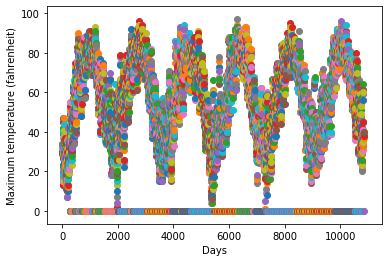

In [8]:
# Graph for maximum temperatures
for i in range(len(tempMax)):
    plt.scatter(i,tempMax[i])
plt.xlabel("Days")
plt.ylabel("Maximum temperature (fahrenheit)")
plt.show()

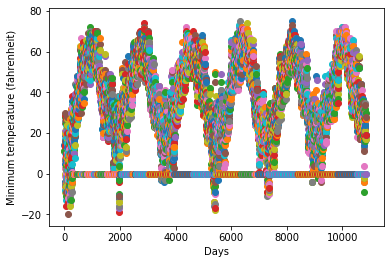

In [7]:
# Graph for minimum temperatures
for i in range(len(tempMin)):
    plt.scatter(i,tempMin[i])
plt.xlabel("Days")
plt.ylabel("Minimum temperature (fahrenheit)")
plt.show()

In [9]:
# Normalization of data function
y = precipitation

def normalize_features( X, mu=None, sigma=None ):
    if mu is None:
        mu    = np.mean(X, axis=0)
        sigma = np.std (X, axis=0)
    # Don't normalize constant features
    mu   [sigma == 0] = 0
    sigma[sigma == 0] = 1
    X_norm = (X - mu)/sigma
        
    return (X_norm, mu, sigma)

m = data.shape[0]
X = np.stack([np.ones(m), tempMax, tempMin], axis=1)
n = X.shape[1]

X, mu, sigma = normalize_features(X)
#print(X)
#print(y)
#print(n)

In [10]:
# Function for logistic function
def logistic(z):
    p = np.full(z.shape, 0.5)
    p = 1/ (1 + np.exp(-z))
    return p

# Function for the cost function
def cost_function(X, y, theta):
    thetaT = np.transpose(theta)
    exponent = np.dot(X, thetaT)
    
    h = 1/(1 + np.exp(-exponent))
    cost = np.dot(-y,np.log(h)) - np.dot((1-y), np.log(1-h))
    return cost

# function for gradient descent
def gradient_descent( X, y, theta, alpha, iters ):
    J_history = []
    for i in range(iters):
        thetaT = np.transpose(theta)
        exponent = np.dot(X,thetaT)
        
        h = 1 / (1 + np.exp(-exponent))
        Jd = 2 * np.dot((h- y), X)
        theta = theta - alpha*Jd
        
        J_history.append(cost_function(X,y,theta))
    return theta, J_history

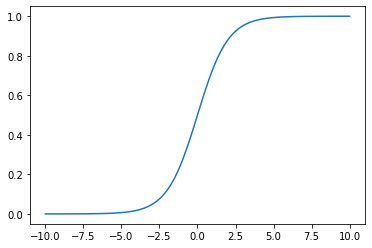

In [11]:
# implement logistic function
z = np.linspace(-10, 10, 100)
plt.plot(z, logistic(z))
plt.show()

In [12]:
#Implement Cost function

theta = np.zeros(n)
print(cost_function(X,y, theta)) # prints 38.81624....

7517.874320353163


In [13]:
#Setup plot for learned model
def plot_model(X, y, theta):
    pos = y==1
    neg = y==0

    plt.scatter(X[pos,1], X[pos,2], marker='+', color='blue', label='Precipitation')
    plt.scatter(X[neg,1], X[neg,2], marker='o', color='red', facecolors='none', label='No Precipitation')

    # plot the decision boundary
    x1_min = np.min(X[:,1]) - 0.5
    x1_max = np.max(X[:,1]) + 0.5

    x1 = np.array([x1_min, x1_max])
    x2 = (theta[0] + theta[1]*x1)/(-theta[2])
    plt.plot(x1, x2, label='Decision boundary')

    plt.xlabel('Max Temp (normalized)')
    plt.ylabel('Min Temp (normalized)')
    plt.legend(loc='lower right')
    plt.show()

250


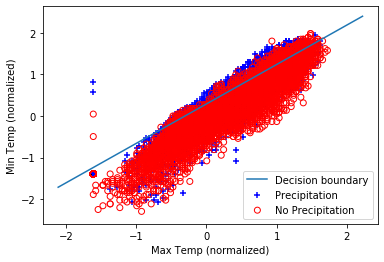

In [20]:
# Implement gradient descent for logiatic regression
theta = np.zeros(n)

#
# YOUR CODE HERE
#
alpha = 0.0002 #step size
iters = 250

# Plots data and decision boundary. If you have learned a good theta
# you will see a decision boundary that separates the data in a 
# reasonable way.
theta2,J_history = gradient_descent( X, y, theta, alpha, iters ) #call gradient function
print(len(J_history)) # check length of J_history 

plot_model(X, y, theta2) 

In [21]:
print("Final value of cost function: ", cost_function(X,y,theta2))

Final value of cost function:  6746.2262736977955


Text(0.5, 1.0, 'Cost Function vs Iterations')

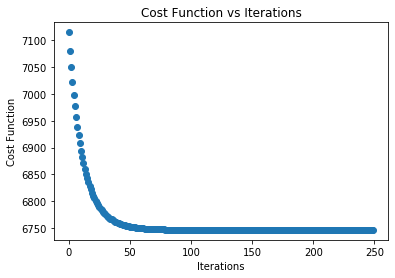

In [22]:
#Plot J_history to assess convergence
i = 0
iList = [] # creates list of iterations
while i < iters: # counts until reaches amount of iterations
    iList.append(i) # adds each iteration to list 
    i = i+1
plt.scatter(iList, J_history) # plot
plt.ylabel("Cost Function")
plt.xlabel("Iterations")
plt.title("Cost Function vs Iterations")


In [78]:
#Print the accuracy -
theta2T = np.transpose(theta2) #transpose of theta2 
h = 1 / (1 + np.exp(-np.dot(X,theta2T))) # h(x)
accurate = 0 #intialize
i = 0 #intialize
while i < len(y): # run if within length of vector y
    if y[i] == round(h[i]): # from  piazza
        accurate= accurate + 1
    i = i + 1
accurate = (1/len(y))*accurate
print("Accuracy: ",accurate)

Accuracy:  0.6705697953162456


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Split and run Logistic Regression
x_train2, x_test2, y_train2, y_test2 = train_test_split(dataToUse, precipitation, test_size=0.2)
Lg = LogisticRegression(max_iter = 10000)


# Cross validate using Gridsearch to improve accuracy
params = {'C': [ 0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]}
LGGrid = GridSearchCV(Lg, params, cv = 5, n_jobs = -1)
LGGrid = LGGrid.fit(x_train2, y_train2)
y_predictTrain = LGGrid.predict(x_train2)
y_predictTest = LGGrid.predict(x_test2)
print("Accuracy scores for list of C: \n",LGGrid.cv_results_['mean_test_score'])
print("\nBest value of C: ",LGGrid.best_params_)
print("Best Accuracy score:", np.max(LGGrid.cv_results_['mean_test_score']))




Accuracy scores for list of C: 
 [0.68648966 0.68833517 0.69986534 0.7095405  0.71634185 0.71979827
 0.71749439 0.70642824 0.71311837 0.69766737 0.70758576 0.69813298]

Best value of C:  {'C': 0.5}
Best Accuracy score: 0.7197982708933718


In [86]:
# logistic regression with built in sklearn features 
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(tol = 0.0000000000000000001, C = 10*10**6, max_iter = 10*10**12, n_jobs = -1)
lrc.fit(x_train2, y_train2)

testPreds = lrc.predict(x_test2)
trainPreds = lrc.predict(x_train2)
print("Test Outcomes", lrc.score(x_test2, y_test2))

Test Outcomes 0.6986175115207374
